# How to plot unstructured mesh file on Jupyter Notebook

@tkoyama010 @PyConJP2020

# Introduction

## Who am I ? About @tkoyama010

FEM  library  #getfem commiter & translator 🇯🇵

🖊 qiita.com/tkoyama010

🖊 note.com/tkoyama

❤ ScipyJapan2020(scipyjapan.scipy.org)

## Summary

- Introduction (1 min)
- Using library (4 min)
- Examples (4 min)
- Development of meshioplt (4 min)
- Summary (1 min)
- Questions and answers (1 min)

# Using library
<p align="center">
  <a href="https://github.com/nschloe/meshio"><img alt="meshio" src="m2_about.jpg" width="40%"></a>
</p>

In [1]:
!cat m.vtk

# vtk DataFile Version 2.0
Exported by getfem++
ASCII
DATASET UNSTRUCTURED_GRID
POINTS 9 float
 0 0 0
 1 0 0
 0 1 0
 1 1 0
 2 0 0
 2 1 0
 0 2 0
 1 2 0
 2 2 0

CELLS 4 20
 4 0 1 3 2
 4 1 4 5 3
 4 2 3 7 6
 4 3 5 8 7

CELL_TYPES 4
 9
 9
 9
 9


# Using library

In [2]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-jovyan'


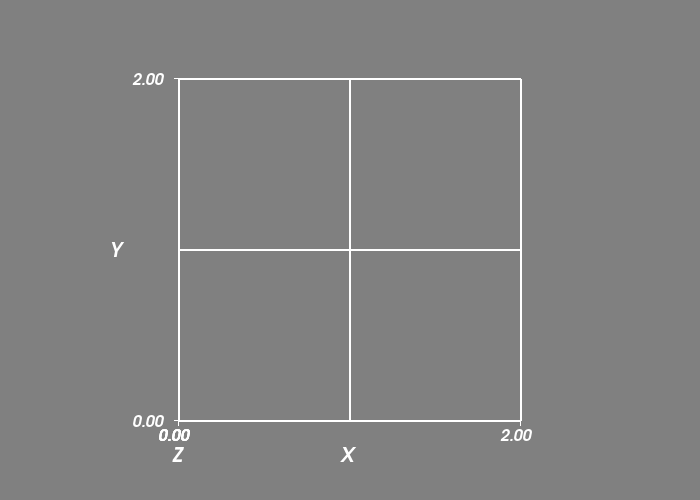

In [3]:
!mayavi2 --offscreen -d m.vtk -m Axes -f ExtractEdges -m Surface \
-s "scene.save('mesh.png', size=(700, 500))"
from IPython.display import Image
Image("mesh.png")

# Using library
<p align="center">
  <a href="https://github.com/nschloe/meshio"><img alt="meshio" src="https://nschloe.github.io/meshio/logo-with-text.svg" width="40%"></a>
  <a href="https://github.com/matplotlib/matplotlib"><img alt="meshio" src="https://matplotlib.org/_static/logo2.svg" width="40%"></a>
</p>

# Using library
## meshio and matplotlib

In [4]:
import meshio
import matplotlib
import matplotlib.pyplot as plt

# Examples
## plotting unstructured 2D mesh and data

# Examples
## plotting unstructured 2D mesh and data

In [5]:
mesh = meshio.read("m.vtk")

In [6]:
points = mesh.points
cells = mesh.cells

In [7]:
cells

[CellBlock(type='quad', data=array([[0, 1, 3, 2],
        [1, 4, 5, 3],
        [2, 3, 7, 6],
        [3, 5, 8, 7]]))]

In [8]:
figure = plt.figure()
axe = figure.add_subplot(111)
for cell in cells:
    for index in cell.data:
        polygon = plt.Polygon(
            (
                (points[index[0], 0], points[index[0], 1]),
                (points[index[1], 0], points[index[1], 1]),
                (points[index[2], 0], points[index[2], 1]),
                (points[index[3], 0], points[index[3], 1]),
            ),
            edgecolor="black",
            facecolor="gray",
        )
        axe.add_patch(polygon)
axe.set_aspect("equal")
plt.xlim(-1.0, 3.0)
plt.ylim(-1.0, 3.0)
plt.savefig("mesh.png")
plt.close()

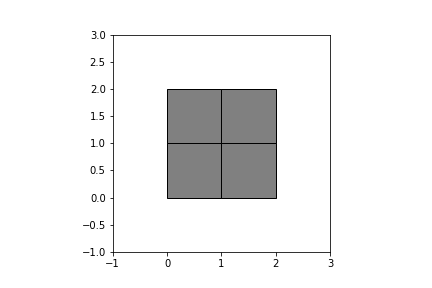

In [9]:
from IPython.display import Image
Image("mesh.png")

# Examples
## plotting unstructured 3D mesh and data

# Examples
## plotting unstructured 3D mesh and data

# development of meshioplt

# What we can do in meshioplt

We can read mesh file and write to AxesSubplot. We can use AxesSubplot as matplotlib's AxesSubplot

# development of meshioplt

In [10]:
from meshioplt import mesh_patches

figure = plt.figure()
axe = figure.add_subplot(111)
patches = mesh_patches("m.vtk")
for patch in patches:
    axe.add_patch(patch)
axe.set_aspect("equal")
plt.xlim(-1.0, 3.0)
plt.ylim(-1.0, 3.0)
plt.savefig("mesh.png")
plt.close()

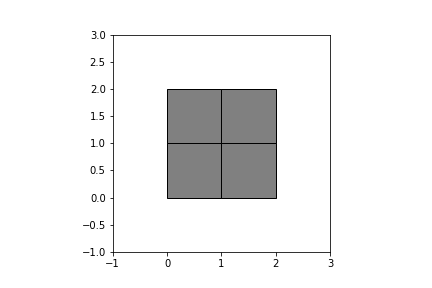

In [11]:
from IPython.display import Image
Image("mesh.png")

# development of meshioplt


<p align="center">
  <a href="https://github.com/nschloe/meshio"><img alt="meshio" src="https://nschloe.github.io/meshio/logo-with-text.svg" width="40%"></a>
  <a href="https://upload.wikimedia.org/wikipedia/commons/c/c8/Love_Heart_symbol.svg"><img alt="heart" src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Love_Heart_symbol.svg" width="20%"></a>
  <a href="https://github.com/matplotlib/matplotlib"><img alt="meshio" src="https://matplotlib.org/_static/logo2.svg" width="40%"></a>
</p>

# Summary
- Introduction (1 min)
- Using library (4 min)
- Examples (4 min)
- Development of meshioplt (4 min)
- Summary (1 min)
- Questions and answers (1 min)

# Questions and answers

In [12]:
import numpy as np

import getfem as gf

with_graphics = True
try:
    import getfem_tvtk
except:
    print("\n** Could NOT import getfem_tvtk -- graphical output disabled **\n")
    import time

    time.sleep(2)
    with_graphics = False


m = gf.Mesh("import", "gid", "tripod.GiD.msh")
print("done!")
mfu = gf.MeshFem(m, 3)  # displacement
mfp = gf.MeshFem(m, 1)  # pressure
mfd = gf.MeshFem(m, 1)  # data
mim = gf.MeshIm(m, gf.Integ("IM_TETRAHEDRON(5)"))
degree = 2
linear = False
incompressible = False  # ensure that degree > 1 when incompressible is on..

mfu.set_fem(gf.Fem("FEM_PK(3,%d)" % (degree,)))
mfd.set_fem(gf.Fem("FEM_PK(3,0)"))
mfp.set_fem(gf.Fem("FEM_PK_DISCONTINUOUS(3,0)"))

print(
    "nbcvs=%d, nbpts=%d, qdim=%d, fem = %s, nbdof=%d"
    % (m.nbcvs(), m.nbpts(), mfu.qdim(), mfu.fem()[0].char(), mfu.nbdof())
)

P = m.pts()
print("test", P[1, :])
ctop = abs(P[1, :] - 13) < 1e-6
cbot = abs(P[1, :] + 10) < 1e-6
pidtop = np.compress(ctop, list(range(0, m.nbpts())))
pidbot = np.compress(cbot, list(range(0, m.nbpts())))

ftop = m.faces_from_pid(pidtop)
fbot = m.faces_from_pid(pidbot)
NEUMANN_BOUNDARY = 1
DIRICHLET_BOUNDARY = 2

m.set_region(NEUMANN_BOUNDARY, ftop)
m.set_region(DIRICHLET_BOUNDARY, fbot)

E = 1e3
Nu = 0.3
Lambda = E * Nu / ((1 + Nu) * (1 - 2 * Nu))
Mu = E / (2 * (1 + Nu))


md = gf.Model("real")
md.add_fem_variable("u", mfu)
if linear:
    md.add_initialized_data("cmu", Mu)
    md.add_initialized_data("clambda", Lambda)
    md.add_isotropic_linearized_elasticity_brick(mim, "u", "clambda", "cmu")
    if incompressible:
        md.add_fem_variable("p", mfp)
        md.add_linear_incompressibility_brick(mim, "u", "p")
else:
    md.add_initialized_data("params", [Lambda, Mu])
    if incompressible:
        lawname = "Incompressible Mooney Rivlin"
        md.add_finite_strain_elasticity_brick(mim, lawname, "u", "params")
        md.add_fem_variable("p", mfp)
        md.add_finite_strain_incompressibility_brick(mim, "u", "p")
    else:
        lawname = "SaintVenant Kirchhoff"
        md.add_finite_strain_elasticity_brick(mim, lawname, "u", "params")


md.add_initialized_data("VolumicData", [0, -1, 0])
md.add_source_term_brick(mim, "u", "VolumicData")

# Attach the tripod to the ground
md.add_Dirichlet_condition_with_multipliers(mim, "u", mfu, 2)

print("running solve...")
md.solve("noisy", "max iter", 1)
U = md.variable("u")
print("solve done!")


mfdu = gf.MeshFem(m, 1)
mfdu.set_fem(gf.Fem("FEM_PK_DISCONTINUOUS(3,1)"))
if linear:
    VM = md.compute_isotropic_linearized_Von_Mises_or_Tresca(
        "u", "clambda", "cmu", mfdu
    )
else:
    VM = md.compute_finite_strain_elasticity_Von_Mises(lawname, "u", "params", mfdu)

# post-processing
sl = gf.Slice(("boundary",), mfu, degree)

print("Von Mises range: ", VM.min(), VM.max())

# export results to VTK
sl.export_to_vtk(
    "tripod.vtk", "ascii", mfdu, VM, "Von Mises Stress", mfu, U, "Displacement"
)


** Could NOT import getfem_tvtk -- graphical output disabled **

done!
nbcvs=2799, nbpts=5621, qdim=3, fem = FEM_PK(3,2), nbdof=16764
test [-10.      -10.       -9.99999 ...  -4.54596  -7.27148  -5.9042 ]
running solve...
solve done!
Von Mises range:  0.3901185300002076 68.7790745848089


In [13]:
import meshio

mesh = meshio.read("tripod.vtk")
vertices = mesh.points
#faces = mesh.cells["triangle"]
faces = mesh.cells[0].data

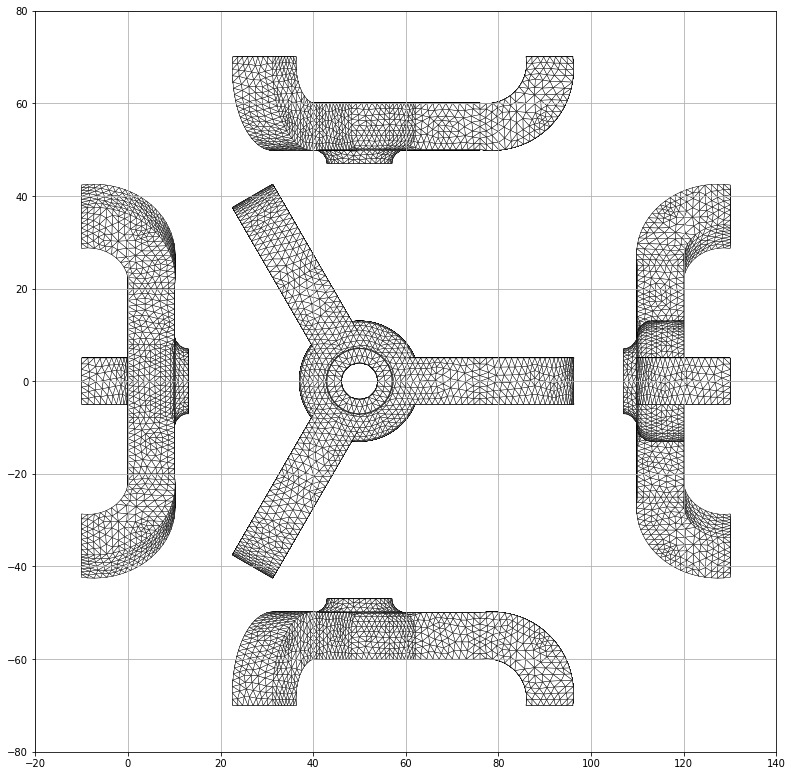

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import numpy as np

fig = plt.figure(figsize=(30, 30))

index1 = np.argsort((vertices[faces][:, :, 1]).mean(axis=1))
collection1 = PolyCollection(
    (vertices[faces][:, :, np.array([0, 2])] + [50.0, 0.0])[index1],
    closed=True,
    linewidth=0.4,
    facecolor="1.0",
    edgecolor="black",
)

index2 = np.argsort((vertices[faces][:, :, 2]).mean(axis=1))
collection2 = PolyCollection(
    (vertices[faces][:, :, np.array([0, 1])]*[1.0, 1.0] + [50.0, -60.0])[index2],
    closed=True,
    linewidth=0.4,
    facecolor="1.0",
    edgecolor="black",
)

index3 = np.argsort((vertices[faces][:, :, 0]).mean(axis=1))
collection3 = PolyCollection(
    (vertices[faces][:, :, np.array([1, 2])]*[-1.0, 1.0] + [120.0, 0.0])[index3],
    closed=True,
    linewidth=0.4,
    facecolor="1.0",
    edgecolor="black",
)

index4 = np.argsort((vertices[faces][:, :, 0]).mean(axis=1)*(-1.0))
collection4 = PolyCollection(
    (vertices[faces][:, :, np.array([1, 2])]*[1.0, 1.0] + [0.0, 0.0])[index4],
    closed=True,
    linewidth=0.4,
    facecolor="1.0",
    edgecolor="black",
)

index5 = np.argsort((vertices[faces][:, :, 2]).mean(axis=1)*(-1.0))
collection5 = PolyCollection(
    (vertices[faces][:, :, np.array([0, 1])]*[1.0, -1.0] + [50.0, 60.0])[index5],
    closed=True,
    linewidth=0.4,
    facecolor="1.0",
    edgecolor="black",
)

ax = fig.add_subplot(211)
ax.set_xlim(-20, 140)
ax.set_ylim(-80, +80)
ax.set_aspect(1)
ax.set_frame_on(True)
ax.add_collection(collection1)
ax.add_collection(collection2)
ax.add_collection(collection3)
ax.add_collection(collection4)
ax.add_collection(collection5)
ax.grid(True)
